# Bayesian modeling with beta distribution conjugate priors

To review the general setup for Bayesian distribution modeling, we have:

### $$P\left(\;model\;|\;data\;\right) = \frac{P\left(\;data\;|\;model\;\right)}{P(\;data\;)} P\left(\;model\;\right)$$

Which in the sense of distributions is:

### $$posterior = likelihood * prior$$

*Where the posterior is an update of our prior belief, given the data observed.*

---

### 1.1 Make functions to calculate the binomial likelihood and log likelihood

The binomial likelihood is defined as:

### $$likelihood(\;p\;|\;n,k\;) = \binom{n}{k}p^k(1-p)^{n-k}$$

It's more used equivalent (because the original breaks easily with high counts) is the log likelihood:

### $$ln(likelihood) = ln\left(\binom{n}{k}\right)+k*ln(p)+(n-k)*ln(1-p)$$

Your functions should:

1. Take a probability (p), number of trials (n), and number of successes (k)
2. Return a likelihood for the trials and successes at that probability 

NOTE: `np.log()` can be used for natural log. `np.exp()` is useful for getting your likelihood out when the log-likelihood function is done computing. `scipy.misc.comb()` can get the combinations.

In [1]:
import numpy as np
from scipy.misc import comb


### 1.2 Calculate likelihoods using both functions for:

    n=10, k=3
    n=10, k=7
    n=20, k=15
    n=50, k=9
    n=70, k=50
    n=100, k=96
    
For probabilities:

    p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Likelihood function probs:
10 3
0.1 0.057395628
0.2 0.201326592
0.3 0.266827932
0.4 0.214990848
0.5 0.1171875
0.6 0.042467328
0.7 0.009001692
0.8 0.000786432
0.9 8.748e-06
---------------------------------

10 7
0.1 8.748e-06
0.2 0.000786432
0.3 0.009001692
0.4 0.042467328
0.5 0.1171875
0.6 0.214990848
0.7 0.266827932
0.8 0.201326592
0.9 0.057395628
---------------------------------

20 15
0.1 9.15495696e-12
0.2 1.66472932393e-07
0.3 3.73897688753e-05
0.4 0.00129449352229
0.5 0.0147857666016
0.6 0.0746470195289
0.7 0.17886305057
0.8 0.174559521557
0.9 0.03192136112
---------------------------------

50 9
0.1 0.0333292700135
0.2 0.136408785536
0.3 0.0219782873811
0.4 0.000526773722318
0.5 2.22527214433e-06
0.6 1.22096668097e-09
0.7 3.68753981662e-14
0.8 7.39473508121e-21
0.9 9.70656349211e-33
---------------------------------

70 50
0.1 1.9681388543e-34
0.2 2.10138229761e-20
0.3 9.27318838554e-13
0.4 7.50291662421e-08
0.5 0.000137121592955
0.6 0.0143869221003
0.7 0.101515566248
0.8 0.02

---

## The beta distribution

The beta distribution is a very useful distribution when modeling Bernoulli processes as we have been doing (occurrences of successes or failures, etc.). It is a good model of the random behavior of data related to percentages and proportions.

The beta distribution takes two parameters: $Beta(\alpha,\beta)$

The $\alpha$ or **alpha** parameter can be thought of as the number of successes - 1

The $\beta$ or **beta** parameter can be thought of as the number of failures - 1

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Beta_distribution_pdf.svg/650px-Beta_distribution_pdf.svg.png" alt="betapdf" style="width: 400px;"/>

---

### 2.1 Plot beta probability density functions

Use the `scipy.stats.beta` object to calculate the probability density function at a range of points.

Make one plot for each of the n, k pairs you calculated the likelihood for above (converting them into success, failure pairs for the alpha, beta parameters).

http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.beta.html

In [25]:
from scipy.stats import beta
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
%matplotlib inline

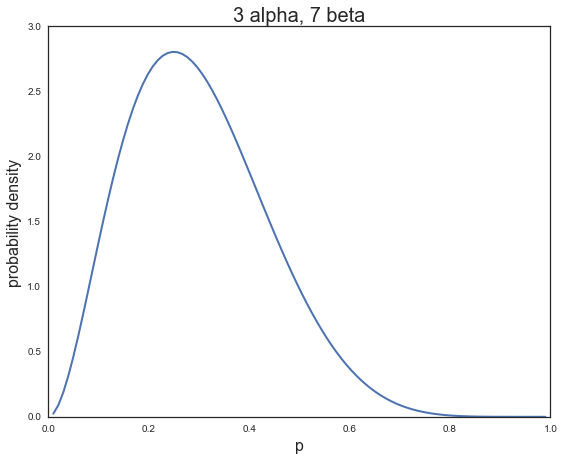

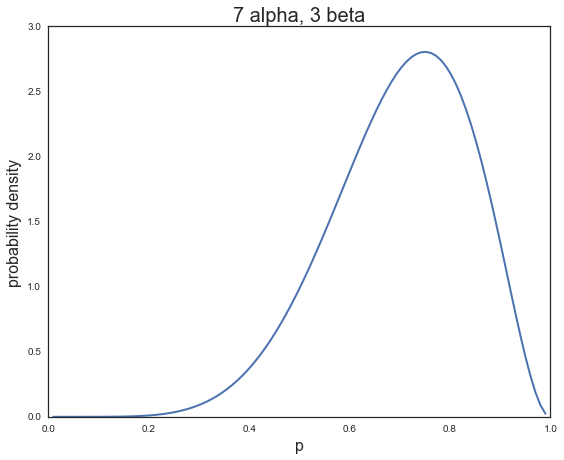

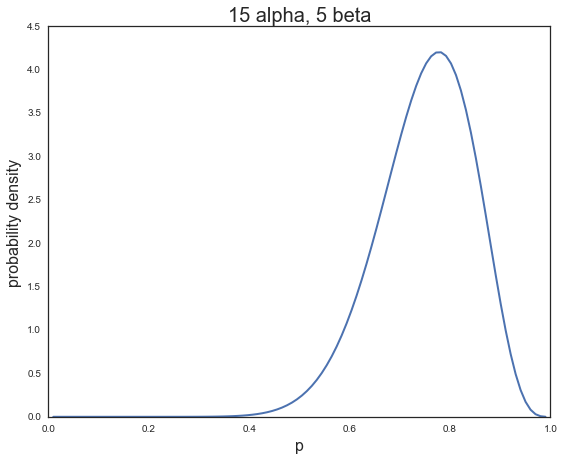

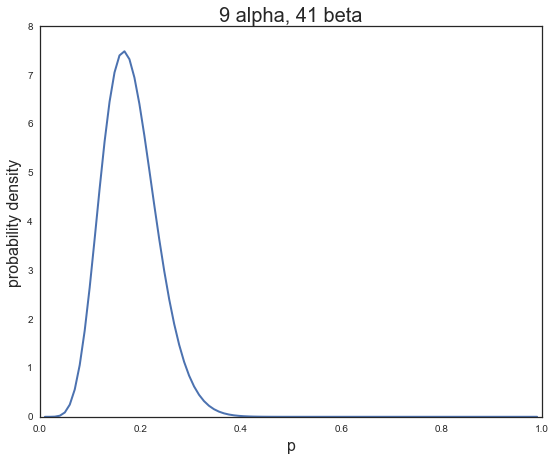

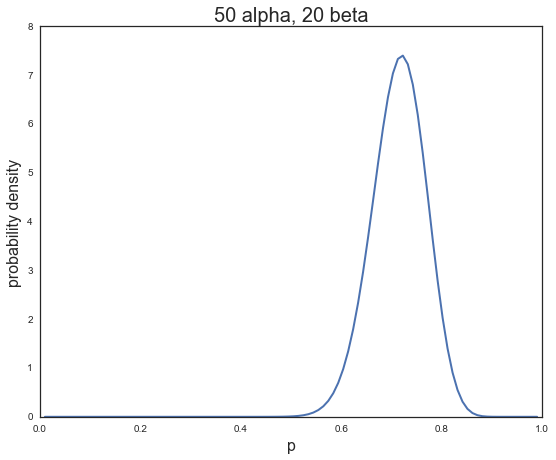

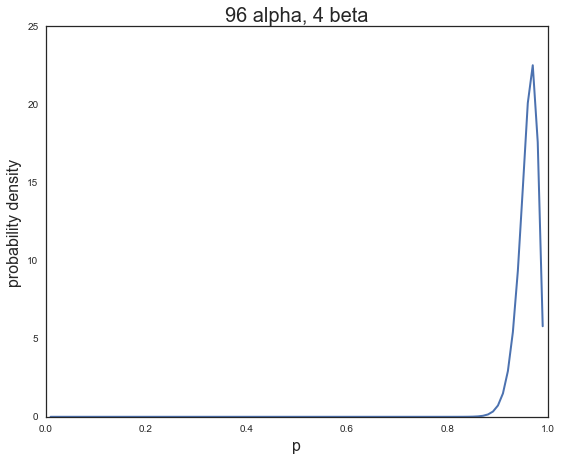

---

## Beta as "conjugate prior"

The beta distribution is a **conjugate prior** for the binomial (and the beta!) distributions. What does this mean?

If we take this calculation of the posterior distribution with a binomial likelihood function (our data is binary outcome data):

### $$\text{posterior} = \text{binomial likelihood} * \text{beta prior}$$

**The fact that the beta distribution is a conjugate prior of the binomial likelihood guarantees that the posterior will also be a beta distribution!**

This is also true when the likelihood is a beta likelihood:

### $$\text{posterior} = \text{beta likelihood} * \text{beta prior}$$

Again, the posterior is guaranteed to be a beta distribution.

Conjugate priors are extremely useful for calculating posteriors easily in certain situations, but in most modeling scenarios we won't be able to use them.

---

### 3.1 Jaywalking probability beta

Without going over the math ([at all.. for a simple overview see here](https://alexanderetz.com/2015/07/25/understanding-bayes-updating-priors-via-the-likelihood/)), to update a beta distribution prior with new information of successes and failures to a beta posterior, the formula is as simple as:

    new_successes = n_a
    new_failures = n_b
    beta_prior = Beta(a_1, b_1)
    beta_posterior = Beta(a_1 + n_a, b_1, n_b)
    
This is extremely useful for stuff like A/B testing, which we will look at later on.

You're watching people cross the street, keeping track of those who jaywalk and those who wait for the cross-walk signal. You specify:

    alpha = number of jaywalkers
    beta = number of law-abiders

So far you've only measured 2 law-abiders and 1 jay-walker. Plot your current probability distribution of jaywalkers at this intersection using the beta pdf.

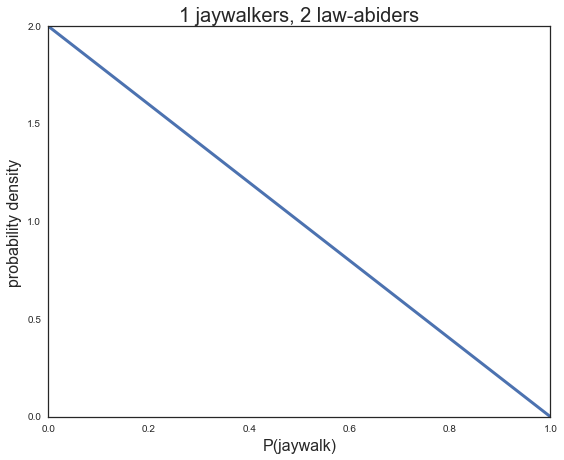

---

### 3.2 Beta posterior updating

You keep track of jaywalker and law-abider counts every 10 minutes. Your records at the end of an hour show:

    10:  jay = 10  law = 1
    20:  jay = 15  law = 2
    30:  jay = 2   law = 40
    40:  jay = 20  law = 20
    50:  jay = 5   law = 20
    60:  jay = 100 law = 3
    
Plot your beta posterior at each increment, updating it with your beta prior from the previous update (starting with the beta you calculated in the previous question).

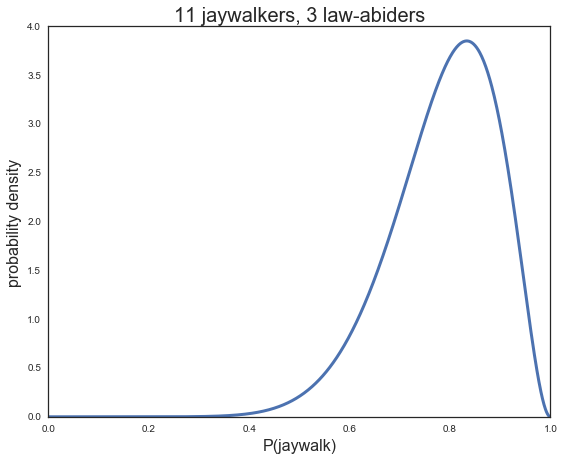

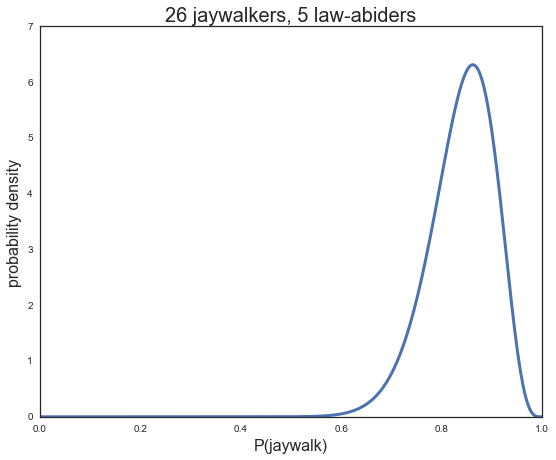

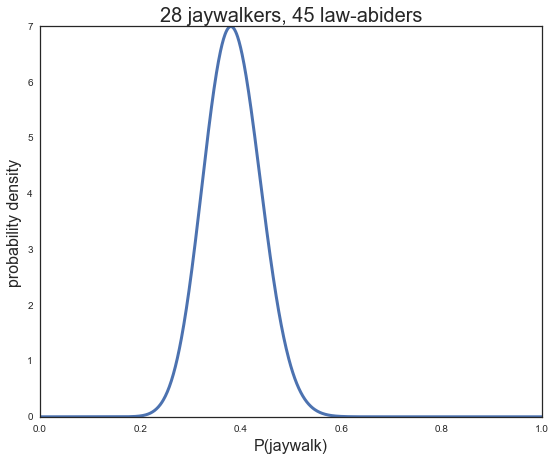

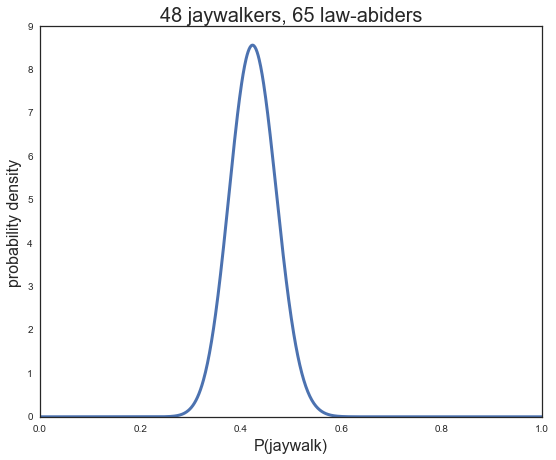

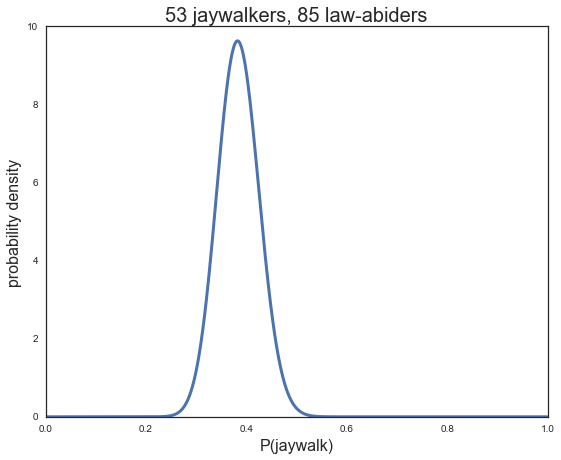

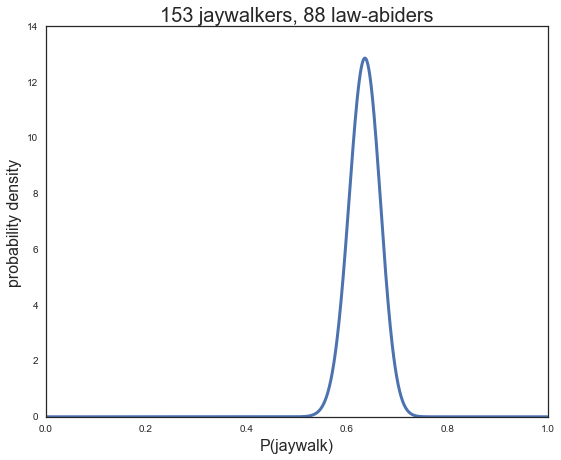

---

### 3.3 Describe your intuition for how the beta distributions change at each step and why.